In [10]:
import pandas as pd

df_pls = pd.read_csv('../data/proposicoes_2013-2024_final.csv')
df_pres_cam = pd.read_csv('../data/presidentes_camara_deputados.csv')


In [11]:
df_pls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7961 entries, 0 to 7960
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   nomeProposicao                          7961 non-null   object
 1   idProposicao                            7961 non-null   int64 
 2   partidoAutor                            7961 non-null   object
 3   DataApresentacao                        7961 non-null   object
 4   Ano                                     7961 non-null   int64 
 5   Administração e Políticas Públicas      7961 non-null   int64 
 6   Desenvolvimento Social e Urbano         7961 non-null   int64 
 7   Direitos e Justiça                      7961 non-null   int64 
 8   Economia e Desenvolvimento Sustentável  7961 non-null   int64 
 9   Infraestrutura e Gestão de Recursos     7961 non-null   int64 
 10  VirouLei                                7961 non-null   int64 
 11  Infl

In [12]:
df_pres_cam['DataInicial'] = pd.to_datetime(df_pres_cam['DataInicial'])
df_pres_cam['DataFinal'] = pd.to_datetime(df_pres_cam['DataFinal'])


In [13]:
print("Column names in df_pls:", df_pls.columns)

# Convert DataApresentacao to datetime if the column exists
if 'DataApresentacao' in df_pls.columns:
    df_pls['DataApresentacao'] = pd.to_datetime(df_pls['DataApresentacao'])
else:
    print("Column 'DataApresentacao' not found in df_pls")

#print(df_pls.head())

Column names in df_pls: Index(['nomeProposicao', 'idProposicao', 'partidoAutor', 'DataApresentacao',
       'Ano', 'Administração e Políticas Públicas',
       'Desenvolvimento Social e Urbano', 'Direitos e Justiça',
       'Economia e Desenvolvimento Sustentável',
       'Infraestrutura e Gestão de Recursos', 'VirouLei', 'Influencia',
       'Aliado', 'Oposição'],
      dtype='object')


In [14]:
df_pls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7961 entries, 0 to 7960
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   nomeProposicao                          7961 non-null   object        
 1   idProposicao                            7961 non-null   int64         
 2   partidoAutor                            7961 non-null   object        
 3   DataApresentacao                        7961 non-null   datetime64[ns]
 4   Ano                                     7961 non-null   int64         
 5   Administração e Políticas Públicas      7961 non-null   int64         
 6   Desenvolvimento Social e Urbano         7961 non-null   int64         
 7   Direitos e Justiça                      7961 non-null   int64         
 8   Economia e Desenvolvimento Sustentável  7961 non-null   int64         
 9   Infraestrutura e Gestão de Recursos     7961 non-nul

In [15]:
df1 = df_pres_cam.sort_values('DataInicial')
df2 = df_pls.sort_values('DataApresentacao')

# Merge DataFrames using pd.merge_asof
merged_df = pd.merge_asof(
    df2,
    df1,
    left_on='DataApresentacao',
    right_on='DataInicial',
    direction='backward',
    suffixes=('', '_Pres_Cam')
)




In [18]:
merged_df = merged_df[(merged_df['DataApresentacao'] >= merged_df['DataInicial']) & (merged_df['DataApresentacao'] <= merged_df['DataFinal'])]

# Garantir que o tamanho do merged_df seja igual ao de df2
if len(merged_df) != len(df2):
    print("O tamanho do merged_df não é igual ao de df2. Preenchendo valores faltantes.")
    merged_df = pd.merge(
        df2,
        merged_df,
        on=['nomeProposicao', 'idProposicao', 'partidoAutor', 'DataApresentacao', 'Ano', 'Administração e Políticas Públicas', 'Desenvolvimento Social e Urbano', 'Direitos e Justiça', 'Economia e Desenvolvimento Sustentável', 'Infraestrutura e Gestão de Recursos', 'VirouLei', 'Influencia', 'Aliado', 'Oposição'],
        how='left',
        suffixes=('', '_Pres_Cam')
    )

# Renomear a coluna Partido para Partido_Pres_Cam
merged_df = merged_df.rename(columns={'Partido': 'Partido_Pres_Cam'})

print("Tamanho de df2:", len(df2))
print("Tamanho de merged_df:", len(merged_df))

O tamanho do merged_df não é igual ao de df2. Preenchendo valores faltantes.
Tamanho de df2: 7961
Tamanho de merged_df: 7961


In [19]:
merged_df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei,Influencia,Aliado,Oposição,DataInicial,DataFinal,AnoInicial,AnoFinal,Partido_Pres_Cam
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0,246.913.580.246.913,1,0,2013-02-04,2015-02-01,2013.0,2015.0,PMDB
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0,246.913.580.246.913,1,0,2013-02-04,2015-02-01,2013.0,2015.0,PMDB
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0,487.329.434.697.855,1,0,2013-02-04,2015-02-01,2013.0,2015.0,PMDB
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0,246.913.580.246.913,1,0,2013-02-04,2015-02-01,2013.0,2015.0,PMDB
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0,779.727.095.516.569,1,0,2013-02-04,2015-02-01,2013.0,2015.0,PMDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,1,1.325.536.062.378.160,1,0,2023-02-02,2025-02-01,2023.0,2025.0,PP
7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,1,1.325.536.062.378.160,1,0,2023-02-02,2025-02-01,2023.0,2025.0,PP
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,1,272.904.483.430.799,1,0,2023-02-02,2025-02-01,2023.0,2025.0,PP
7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0,1.130.604.288.499.020,1,0,2023-02-02,2025-02-01,2023.0,2025.0,PP


In [20]:
merged_df["PPC_igual_partidoAutor"] = (merged_df["Partido_Pres_Cam"] == merged_df["partidoAutor"])
print(merged_df["PPC_igual_partidoAutor"].value_counts())


PPC_igual_partidoAutor
False    7451
True      510
Name: count, dtype: int64


In [21]:
merged_df['PPC_igual_partidoAutor'] = merged_df['PPC_igual_partidoAutor'].astype(int)

In [22]:
final_df = merged_df.drop(columns=['DataInicial', 'DataFinal', 'AnoInicial', 'AnoFinal'])

In [24]:
final_df.to_csv('../data/proposicoes_2013-2024_final_pres_cam.csv', index=False)
print("Final DataFrame saved to ../data/proposicoes_2013-2024_final_pres_cam.csv")

Final DataFrame saved to ../data/proposicoes_2013-2024_final_pres_cam.csv


In [25]:
final_df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0,246.913.580.246.913,1,0,PMDB,0
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0,246.913.580.246.913,1,0,PMDB,0
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0,487.329.434.697.855,1,0,PMDB,0
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0,246.913.580.246.913,1,0,PMDB,0
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0,779.727.095.516.569,1,0,PMDB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,1,1.325.536.062.378.160,1,0,PP,0
7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,1,1.325.536.062.378.160,1,0,PP,0
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,1,272.904.483.430.799,1,0,PP,0
7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0,1.130.604.288.499.020,1,0,PP,0


                                             Ano  \
Ano                                     1.000000   
Administração e Políticas Públicas      0.039835   
Desenvolvimento Social e Urbano         0.172796   
Direitos e Justiça                      0.124832   
Economia e Desenvolvimento Sustentável  0.090259   
Infraestrutura e Gestão de Recursos     0.052974   
VirouLei                                0.084448   
Aliado                                 -0.093797   
Oposição                                0.204573   
PPC_igual_partidoAutor                 -0.036037   

                                        Administração e Políticas Públicas  \
Ano                                                               0.039835   
Administração e Políticas Públicas                                1.000000   
Desenvolvimento Social e Urbano                                  -0.279958   
Direitos e Justiça                                               -0.114401   
Economia e Desenvolvimento Sustentáve

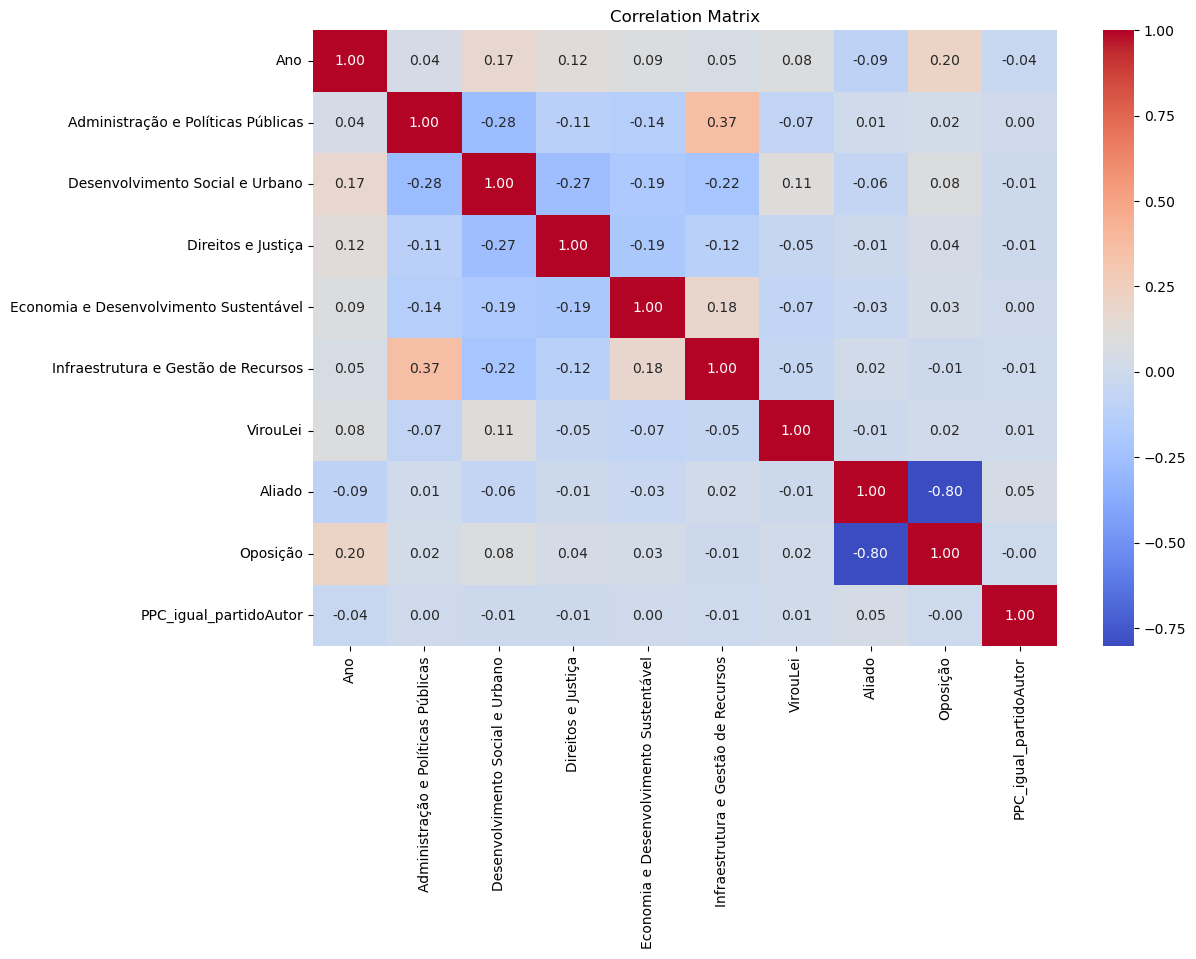

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
# Compute the correlation matrix
df = final_df.iloc[:, 4:]
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()